### Training an autoencoder for the digits dataset 

In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from nn.nn import NeuralNetwork
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd 

In [39]:
#load in digits dataset 

#digits.data is shape (1794, 64) --> 64 is flattened image pixels 
digits = load_digits()
  
#split into train and test sets 
X_train, X_test, y_train, y_test=train_test_split(digits.data, digits.target, train_size=0.8, random_state=3)
print(X_train.shape)

(1437, 64)


Before running the final model, we'll tune some hyperparamters. The input dimensions will remain unchanged as they were defined in the assignment. I chose relu for the activation function because -------. I also chose MSE for the loss function since the goal of this autoencoder is reconstruction (more of a regression task), not classification. I will also keep the number of epochs the same. In this case, runtime isn't an issue so I'll just let it run for more epochs than really necessary. In the future, I'd choose the number of epochs based on how quickly the loss decreases. However, I will tune the learning rate and batch size below. 

In [42]:
#tune some hyperparameters 


#test lr, batch_size
lr_test=[0.01, 0.001, 0.0001]
batch_size_test=[50, 100, 200, 400]

hyperparameters=[(x, y) for x in lr_test for y in batch_size_test]


val_loss_list=[]
#go through hyperparameters
print('tuning for the following hyperparameters...')
for hp in hyperparameters:
    print('lr, batch_size:', hp)
        
    run_NN = NeuralNetwork(nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
                                      {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
                                    lr = hp[0], seed = 3, batch_size = hp[1], epochs = 500, 
                                    loss_function='mse', verbose=False)
    
    per_epoch_loss_train, per_epoch_loss_val=run_NN.fit(X_train, X_train, X_test, X_test)
    
    
    #store average of the last 10 epochs of validation loss 
    val_loss_list.append(np.mean(per_epoch_loss_val[-10:]))

tuning for the following hyperparameters...
lr, batch_size: (0.01, 50)
lr, batch_size: (0.01, 100)
lr, batch_size: (0.01, 200)
lr, batch_size: (0.01, 400)
lr, batch_size: (0.001, 50)
lr, batch_size: (0.001, 100)
lr, batch_size: (0.001, 200)
lr, batch_size: (0.001, 400)
lr, batch_size: (0.0001, 50)
lr, batch_size: (0.0001, 100)
lr, batch_size: (0.0001, 200)
lr, batch_size: (0.0001, 400)


In [46]:
#select hyperparameters with minimum validation loss 
hp_idx=np.argmin(val_loss_list)
print('best hyperparameters lr, batch_size:', hyperparameters[hp_idx])

best hyperparameters lr, batch_size: (0.0001, 50)


We've selected the final hyperparameters as -------. If I had more time, I'd do some cross validation. For today, we will proceed with this final model. 

In [50]:
final_autoencoder = NeuralNetwork(nn_arch = [{'input_dim': 64, 'output_dim': 16, 'activation': 'relu'},
                                      {'input_dim': 16, 'output_dim': 64, 'activation': 'relu'}],
                                lr = 0.0001, seed = 3, batch_size = 50, epochs = 500, 
                               loss_function='mse', verbose=True)

In [51]:
#run model on test data 
per_epoch_loss_train, per_epoch_loss_val=final_autoencoder.fit(X_train, X_train, X_test, X_test)

epoch:  0
epoch:  100
epoch:  200
epoch:  300
epoch:  400


We'll then look at the training and validation loss histories. 

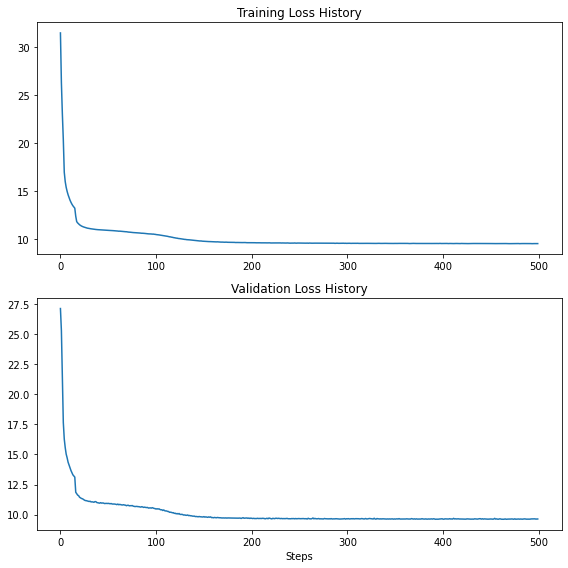

In [52]:
#code from hw7
#plot training and reconstruction loss for final model

fig, axs = plt.subplots(2, figsize=(8, 8))
axs[0].plot(np.arange(len(per_epoch_loss_train)), per_epoch_loss_train)
axs[0].set_title('Training Loss History')
axs[1].plot(np.arange(len(per_epoch_loss_val)), per_epoch_loss_val)
axs[1].set_title('Validation Loss History')
plt.xlabel('Steps')
fig.tight_layout()
plt.show()

The total reconstruction error (MSE) is around -----, as shown below. We also have an example of a reconstructed digit. 

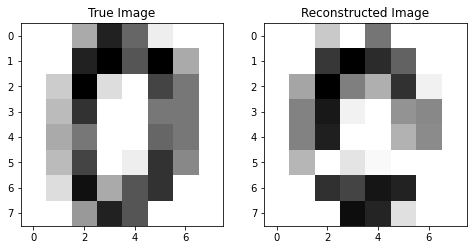

In [55]:
#make prediction with tuned autoencoder 

digits_pred=final_autoencoder.predict(X_test)

#for index 0

idx_0_reshape= np.reshape(digits_pred[0], (8, 8))


fig, axs = plt.subplots(1,2, figsize=(8, 8))

axs[0].imshow(digits.images[0], cmap='binary')
axs[1].imshow(idx_0_reshape, cmap='binary')
axs[0].set_title('True Image')
axs[1].set_title('Reconstructed Image')

plt.show()

Looks alright to me